In [1]:
#importing nessasary library
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#reading csv file
data = pd.read_csv("scholarship.csv")

In [3]:
#using info() function
#type
#Range index
#data and its type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semester_percentage     1000 non-null   float64
 1   scholarship_exam_marks  1000 non-null   int64  
 2   got_scholarship         1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
#using "describe()" Function
data.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [5]:
data.head() #head() Function

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


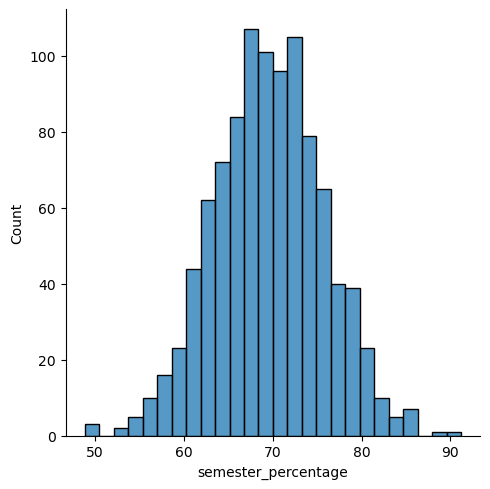

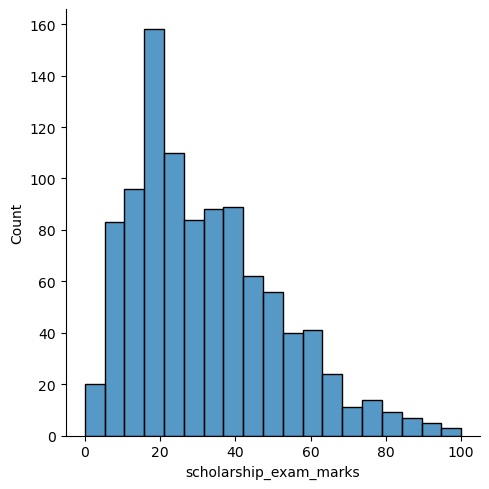

In [6]:
# plt.subplot(1,2,1)
sns.displot(data['semester_percentage'])
# plt.subplot(1,2,2)
sns.displot(data["scholarship_exam_marks"])
# plt.show()

## Printing some statistics Characteristics


In [7]:
print(f"Mean = {data["semester_percentage"].mean()}") #mean() function used
print(f"Std = {data["semester_percentage"].std()}") #std() function used to calculate the standard daviation
print(f"Max = {data["semester_percentage"].max()}") # max() functioj for the max value
print(f"Min = {data["semester_percentage"].min()}") #min function for the min value obvious

Mean = 69.6124
Std = 6.158978751323897
Max = 91.2
Min = 48.9


## Allowed values should be in range of [(mean - 3*Std) <----> (mean + 3*Std)]

In [8]:
print(f"Highest Allowed = {data["semester_percentage"].mean() + 3*data["semester_percentage"].std()}")
print(f"Lowest Allowed = {data["semester_percentage"].mean() - 3*data["semester_percentage"].std()}")

Highest Allowed = 88.08933625397168
Lowest Allowed = 51.13546374602831


## Printing Outliers

In [9]:
data[(data["semester_percentage"]< 51.13) | (data["semester_percentage"] > 88.08)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


## Triming

In [10]:
data[(data["semester_percentage"]> 51.13) & (data["semester_percentage"] < 88.08)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


# Another method to trim
---:Z-Score:----
A z-score tells you how many standard deviations away a data point is from the mean of the distribution.
## Z = (x - mean)/std

In [11]:
#using Z score only valid for normal distribution or bell shaped curve
data["z_score"] = (data["semester_percentage"] - data["semester_percentage"].mean())/data["semester_percentage"].std()

In [12]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
998,86.2,46,1,2.693239


# now we have new column of z score then its mean become 0 and standard deviation become 1.

In [13]:
data["z_score"].mean().round(5)


np.float64(0.0)

In [14]:
data[data["z_score"]<-3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [15]:
data[data["z_score"]>3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062


In [16]:
data[(data["z_score"]>-3) & (data["z_score"]<3)] #here we trim the data and get the same output

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


## #capping

In [17]:
upper_limit = data["semester_percentage"].mean()+ 3* data["semester_percentage"].std()
upper_limit

np.float64(88.08933625397168)

In [18]:
lower_limit = data["semester_percentage"].mean()- 3* data["semester_percentage"].std()
lower_limit

np.float64(51.13546374602831)

In [19]:
data["semester_percentage"] = np.where(data["semester_percentage"]>upper_limit, upper_limit,
                                      np.where(data["semester_percentage"]< lower_limit, lower_limit, data["semester_percentage"]))

In [20]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239
